# Link To The Dataset On Kaggle
https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification/code

# Reading The Data

In [56]:
import pandas as pd
data=pd.read_csv("predictive_maintenance.csv")

In [57]:
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


# Understanding The Data

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [59]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


# Feature Selection 1

In [60]:
data.drop(["Failure Type","UDI"],inplace=True,axis=1)

# Check Nulls

In [61]:
data.isna().sum()

Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
dtype: int64

# Check Dublicated

In [62]:
data.duplicated().sum()

np.int64(0)

# Outlayers

In [63]:
for i in data.columns:
    if(data[i].dtype in ["int64","float64"]):
        print(i)
        print(data[i].describe())

Air temperature [K]
count    10000.000000
mean       300.004930
std          2.000259
min        295.300000
25%        298.300000
50%        300.100000
75%        301.500000
max        304.500000
Name: Air temperature [K], dtype: float64
Process temperature [K]
count    10000.000000
mean       310.005560
std          1.483734
min        305.700000
25%        308.800000
50%        310.100000
75%        311.100000
max        313.800000
Name: Process temperature [K], dtype: float64
Rotational speed [rpm]
count    10000.000000
mean      1538.776100
std        179.284096
min       1168.000000
25%       1423.000000
50%       1503.000000
75%       1612.000000
max       2886.000000
Name: Rotational speed [rpm], dtype: float64
Torque [Nm]
count    10000.000000
mean        39.986910
std          9.968934
min          3.800000
25%         33.200000
50%         40.100000
75%         46.800000
max         76.600000
Name: Torque [Nm], dtype: float64
Tool wear [min]
count    10000.000000
mean       1

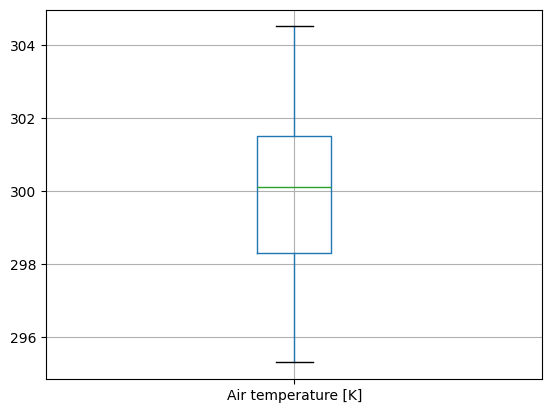

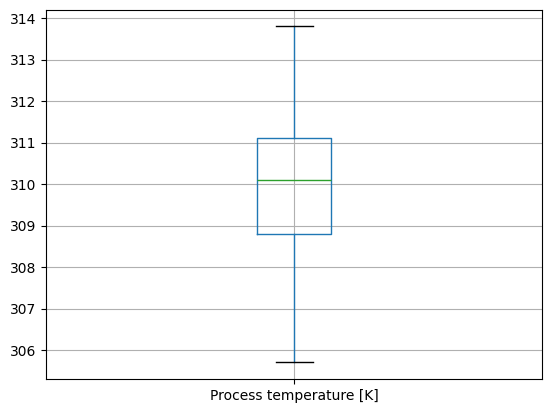

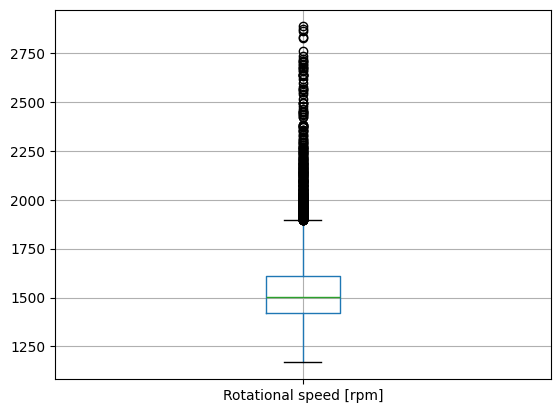

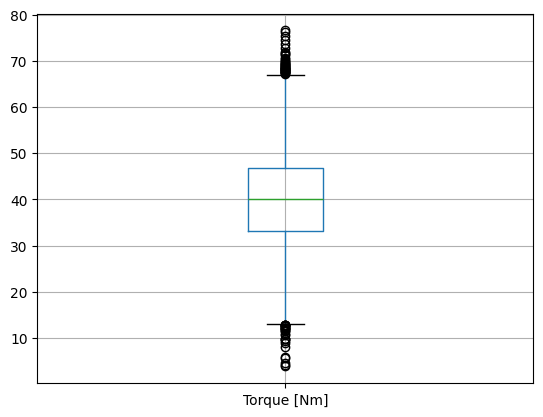

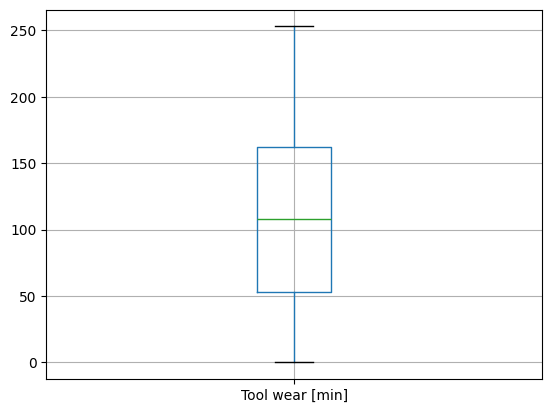

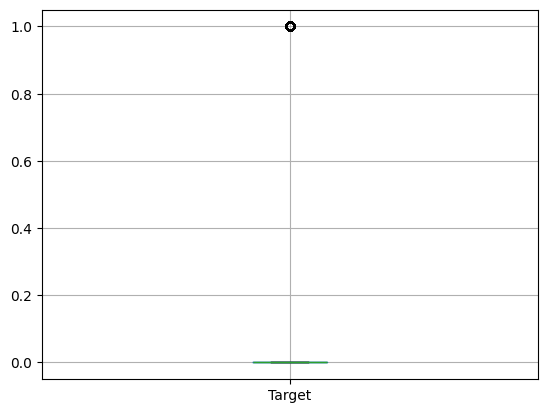

In [64]:
import matplotlib.pyplot as plt
for i in data.columns:
    if(data[i].dtype in ["int64","float64"]):
        data.boxplot(i)
        plt.show()  

In [65]:
Q1 = data["Rotational speed [rpm]"].quantile(0.25)
Q3 = data["Rotational speed [rpm]"].quantile(0.75)
iqr = Q3 - Q1
max = Q3 + (iqr * 1.5)
min = Q1 - (iqr * 1.5)

print(f"max is {max}")
print(f"min is {min}")

outlayerrpm = data[(data["Rotational speed [rpm]"] > max) | (data["Rotational speed [rpm]"] < min)]
data = data[(data["Rotational speed [rpm]"] <= max) & (data["Rotational speed [rpm]"] >= min)]

print(f"shape of outlayerrpm: {outlayerrpm.shape}")
print(f"shape of data: {data.shape}")


max is 1895.5
min is 1139.5
shape of outlayerrpm: (418, 8)
shape of data: (9582, 8)


In [66]:
Q1=data["Torque [Nm]"].quantile(0.25)
Q3=data["Torque [Nm]"].quantile(0.75)
iqr=Q3-Q1
max=Q3+(iqr*1.5)
min=Q1-(iqr*1.5)
print(f"max is{max}")
print(f"min is{min}")
outlayerNm = data[(data["Torque [Nm]"] > max) | (data["Torque [Nm]"] < min)]

data=data[(data["Torque [Nm]"]<=max) & (data["Torque [Nm]"]>=min)]
print(f"shape of outlayerNm :{outlayerNm.shape}")
print(f"shape of data :{data.shape}")

max is66.45
min is14.850000000000005
shape of outlayerNm :(47, 8)
shape of data :(9535, 8)


In [67]:
data

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M14860,M,298.1,308.6,1551,42.8,0,0
1,L47181,L,298.2,308.7,1408,46.3,3,0
2,L47182,L,298.1,308.5,1498,49.4,5,0
3,L47183,L,298.2,308.6,1433,39.5,7,0
4,L47184,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...,...
9995,M24855,M,298.8,308.4,1604,29.5,14,0
9996,H39410,H,298.9,308.4,1632,31.8,17,0
9997,M24857,M,299.0,308.6,1645,33.4,22,0
9998,H39412,H,299.0,308.7,1408,48.5,25,0


# Check Number Of Unique Value

In [68]:
for i in data.columns:
    if(data[i].dtype=="object"):
        print(i)
        print(len(data[i].unique()))

Product ID
9535
Type
3


# Feature Selection 2

In [69]:
data.drop("Product ID",inplace=True,axis=1)

In [70]:
data

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0
9996,H,298.9,308.4,1632,31.8,17,0
9997,M,299.0,308.6,1645,33.4,22,0
9998,H,299.0,308.7,1408,48.5,25,0


# Check Balance In Category In TYPE

In [71]:
data["Type"].value_counts()

Type
L    5713
M    2859
H     963
Name: count, dtype: int64

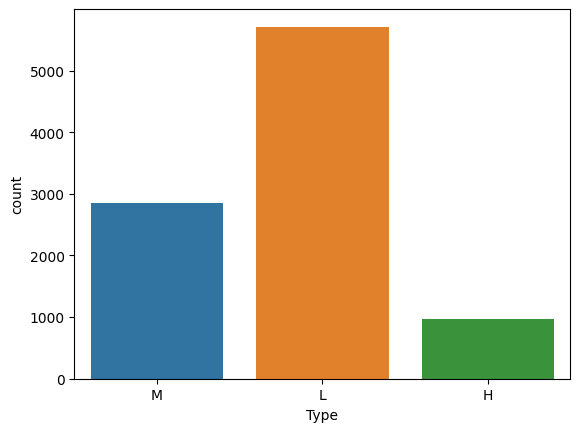

In [72]:
import seaborn as sns
sns.countplot(x="Type",data=data)
plt.show()

In [73]:
##not balanced

# Use RandomOverSampler To Balance TYPE

In [74]:
from imblearn.over_sampling import RandomOverSampler
X = data.drop("Type", axis=1)
y = data["Type"]
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)
print(balanced_data["Type"].value_counts())

Type
M    5713
L    5713
H    5713
Name: count, dtype: int64


C:\Users\Y\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\Y\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [75]:
balanced_data

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type
0,298.1,308.6,1551,42.8,0,0,M
1,298.2,308.7,1408,46.3,3,0,L
2,298.1,308.5,1498,49.4,5,0,L
3,298.2,308.6,1433,39.5,7,0,L
4,298.2,308.7,1408,40.0,9,0,L
...,...,...,...,...,...,...,...
17134,300.5,309.9,1735,27.0,107,0,M
17135,300.6,310.0,1478,36.3,95,0,M
17136,301.0,312.1,1664,28.4,168,0,M
17137,298.7,309.8,1435,48.8,71,0,M


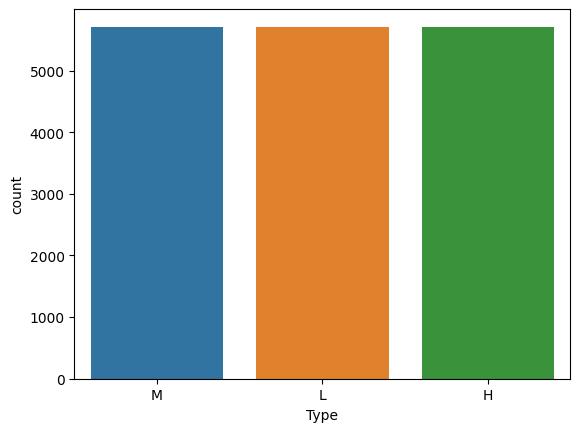

In [76]:
sns.countplot(x="Type",data=balanced_data)
plt.show()

# Encoding By Ordinal Encoder

In [77]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['L', 'M', 'H']])
balanced_data['Type_encoded'] = encoder.fit_transform(balanced_data[['Type']])
print(balanced_data[['Type', 'Type_encoded']])

      Type  Type_encoded
0        M           1.0
1        L           0.0
2        L           0.0
3        L           0.0
4        L           0.0
...    ...           ...
17134    M           1.0
17135    M           1.0
17136    M           1.0
17137    M           1.0
17138    M           1.0

[17139 rows x 2 columns]


In [78]:
balanced_data

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type,Type_encoded
0,298.1,308.6,1551,42.8,0,0,M,1.0
1,298.2,308.7,1408,46.3,3,0,L,0.0
2,298.1,308.5,1498,49.4,5,0,L,0.0
3,298.2,308.6,1433,39.5,7,0,L,0.0
4,298.2,308.7,1408,40.0,9,0,L,0.0
...,...,...,...,...,...,...,...,...
17134,300.5,309.9,1735,27.0,107,0,M,1.0
17135,300.6,310.0,1478,36.3,95,0,M,1.0
17136,301.0,312.1,1664,28.4,168,0,M,1.0
17137,298.7,309.8,1435,48.8,71,0,M,1.0


In [79]:
balanced_data.drop("Type",inplace=True,axis=1)

In [80]:
balanced_data

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_encoded
0,298.1,308.6,1551,42.8,0,0,1.0
1,298.2,308.7,1408,46.3,3,0,0.0
2,298.1,308.5,1498,49.4,5,0,0.0
3,298.2,308.6,1433,39.5,7,0,0.0
4,298.2,308.7,1408,40.0,9,0,0.0
...,...,...,...,...,...,...,...
17134,300.5,309.9,1735,27.0,107,0,1.0
17135,300.6,310.0,1478,36.3,95,0,1.0
17136,301.0,312.1,1664,28.4,168,0,1.0
17137,298.7,309.8,1435,48.8,71,0,1.0


In [81]:
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17139 entries, 0 to 17138
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      17139 non-null  float64
 1   Process temperature [K]  17139 non-null  float64
 2   Rotational speed [rpm]   17139 non-null  int64  
 3   Torque [Nm]              17139 non-null  float64
 4   Tool wear [min]          17139 non-null  int64  
 5   Target                   17139 non-null  int64  
 6   Type_encoded             17139 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 937.4 KB


# Check Correlation

In [82]:
balanced_data.corr()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_encoded
Air temperature [K],1.000000,0.875026,0.014301,-0.010114,0.004799,0.091646,-0.030367
Process temperature [K],0.875026,1.000000,0.009043,-0.006264,0.004954,0.036480,-0.023178
Rotational speed [rpm],0.014301,0.009043,1.000000,-0.893062,0.010193,-0.153222,0.011508
Torque [Nm],-0.010114,-0.006264,-0.893062,1.000000,-0.009059,0.192815,-0.016054
Tool wear [min],0.004799,0.004954,0.010193,-0.009059,1.000000,0.094483,-0.000719
Target,0.091646,0.036480,-0.153222,0.192815,0.094483,1.000000,-0.042914
Type_encoded,-0.030367,-0.023178,0.011508,-0.016054,-0.000719,-0.042914,1.000000


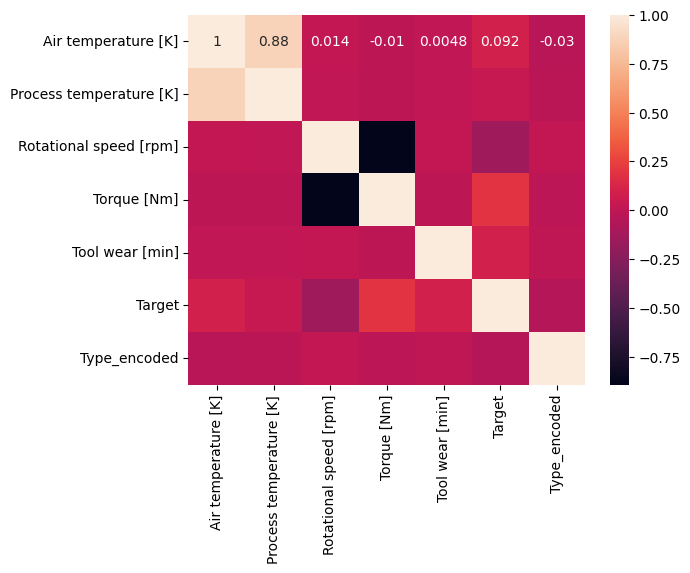

In [83]:
import seaborn as sns 
sns.heatmap(balanced_data.corr(), annot=True)
plt.show()

# Split X,Y

In [84]:
X=balanced_data.drop(["Target"],inplace=False,axis=1)
y=balanced_data["Target"]

# Check Balance In Target

In [85]:
balanced_data["Target"].value_counts()

Target
0    16745
1      394
Name: count, dtype: int64

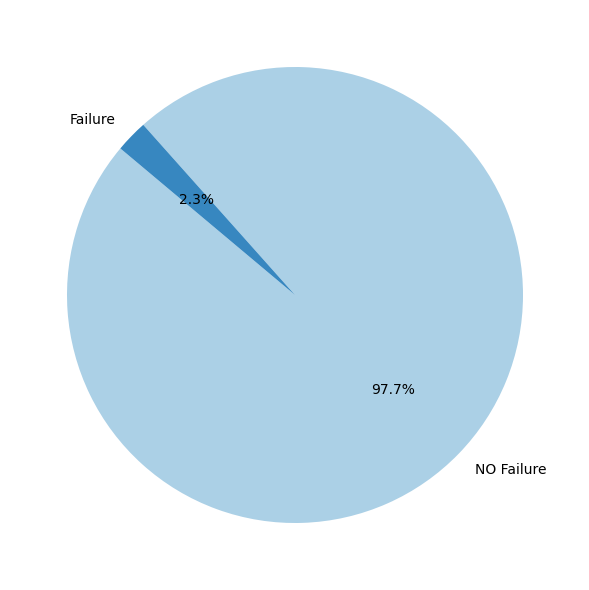

In [86]:
counts = balanced_data['Target'].value_counts().sort_index()
palette = sns.color_palette("Blues", n_colors=len(counts))
fig = plt.figure(figsize=(10, 6))
plt.pie(counts, autopct='%1.1f%%', startangle=140, colors=palette, labels=["NO Failure", "Failure"])
plt.tight_layout()
plt.show()

In [87]:
## notbalanced

# Use Smote To Balabce Target

In [88]:
from imblearn.over_sampling import SMOTE

In [89]:
smote = SMOTE(random_state=42)
X,y = smote.fit_resample(X, y)

C:\Users\Y\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\Y\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [90]:
y.value_counts() 

Target
0    16745
1    16745
Name: count, dtype: int64

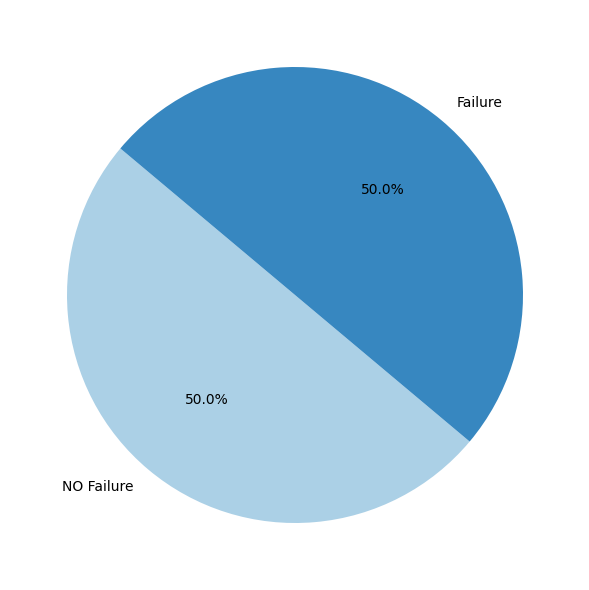

In [91]:
counts = y.value_counts().sort_index()
palette = sns.color_palette("Blues", n_colors=len(counts))
fig = plt.figure(figsize=(10, 6))

plt.pie(counts, autopct='%1.1f%%', startangle=140, colors=palette, labels=["NO Failure", "Failure"])
plt.tight_layout()
plt.show()


# Feature Selection 3 By SelectPercentile

In [92]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif 

In [93]:
FeatureSelection = SelectPercentile(score_func = chi2, percentile=80)
X = FeatureSelection.fit_transform(X, y)

In [94]:
pd.DataFrame(X)

,0,1,2,3
0,1551.0,42.800000,0.0,1.000000
1,1408.0,46.300000,3.0,0.000000
2,1498.0,49.400000,5.0,0.000000
3,1433.0,39.500000,7.0,0.000000
4,1408.0,40.000000,9.0,0.000000
...,...,...,...,...
33485,1308.0,53.042611,86.0,0.000000
33486,1334.0,52.463531,167.0,0.000000
33487,1348.0,59.248640,203.0,0.299093
33488,1391.0,58.688428,194.0,0.000000


In [95]:
balanced_data

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_encoded
0,298.1,308.6,1551,42.8,0,0,1.0
1,298.2,308.7,1408,46.3,3,0,0.0
2,298.1,308.5,1498,49.4,5,0,0.0
3,298.2,308.6,1433,39.5,7,0,0.0
4,298.2,308.7,1408,40.0,9,0,0.0
...,...,...,...,...,...,...,...
17134,300.5,309.9,1735,27.0,107,0,1.0
17135,300.6,310.0,1478,36.3,95,0,1.0
17136,301.0,312.1,1664,28.4,168,0,1.0
17137,298.7,309.8,1435,48.8,71,0,1.0


# Split The Data Train And Test

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44, shuffle=True)

print('X_train shape is ', X_train.shape)
print('X_test shape is ', X_test.shape)
print('y_train shape is ', y_train.shape)
print('y_test shape is ', y_test.shape)


X_train shape is  (26792, 4)
X_test shape is  (6698, 4)
y_train shape is  (26792,)
y_test shape is  (6698,)


# Train Model By Use Gridsearchcv

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
RandomForestClassifierModel = RandomForestClassifier(random_state=33)
param_grid = {
    'n_estimators': [50, 100, 200],   
    'max_depth': [None, 5, 10, 20],   
    'criterion': ['gini', 'entropy'],   
}
grid_search = GridSearchCV(estimator=RandomForestClassifierModel, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Best Parameters:  {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 200}


RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=33)

# Evaluation

In [108]:
from sklearn.metrics import classification_report

In [109]:
y_pred=best_model.predict(X_test)
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is :\n ', ClassificationReport )

Classification Report is :
                precision    recall  f1-score   support

           0       1.00      0.98      0.99      3279
           1       0.98      1.00      0.99      3419

    accuracy                           0.99      6698
   macro avg       0.99      0.99      0.99      6698
weighted avg       0.99      0.99      0.99      6698



# Train Model By Use Gridsearchcv

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
    'n_estimators': [50, 100, 150], 
    'max_depth': [3, 4, 5], 
}
GBCModel = GradientBoostingClassifier(random_state=33)
grid_search = GridSearchCV(estimator=GBCModel, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Best Parameters:  {'max_depth': 5, 'n_estimators': 150}


GradientBoostingClassifier(max_depth=5, n_estimators=150, random_state=33)

# Evaluation

In [104]:
y_pred=best_model.predict(X_test)
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is :\n ', ClassificationReport )

Classification Report is :
                precision    recall  f1-score   support

           0       0.99      0.96      0.97      3279
           1       0.96      0.99      0.97      3419

    accuracy                           0.97      6698
   macro avg       0.97      0.97      0.97      6698
weighted avg       0.97      0.97      0.97      6698



# Train Model By Use Gridsearchcv

In [97]:

from sklearn.tree import DecisionTreeClassifier
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 4, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20]
}
dtcModel = DecisionTreeClassifier(random_state=33)
grid_search = GridSearchCV(estimator=dtcModel, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Best Parameters:  {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


DecisionTreeClassifier(criterion='entropy', random_state=33)

# Evaluation

In [98]:
y_pred=best_model.predict(X_test)
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is :\n ', ClassificationReport )

Classification Report is :
                precision    recall  f1-score   support

           0       0.99      0.98      0.99      3279
           1       0.98      0.99      0.99      3419

    accuracy                           0.99      6698
   macro avg       0.99      0.99      0.99      6698
weighted avg       0.99      0.99      0.99      6698



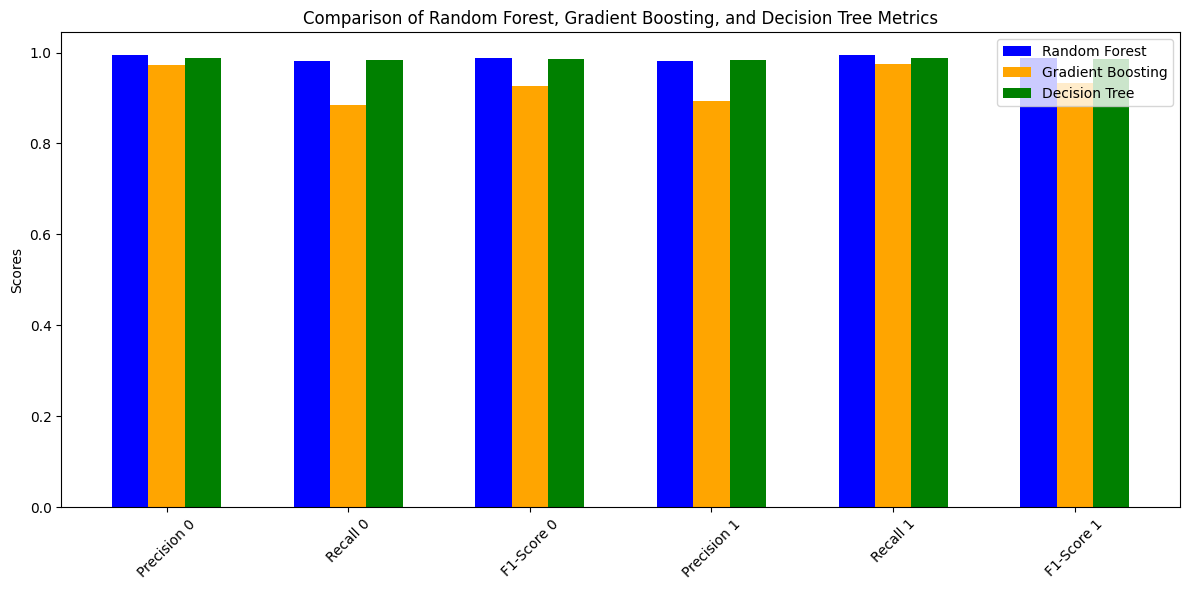

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV


rfc = RandomForestClassifier(random_state=33)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
report_rfc = classification_report(y_test, y_pred_rfc, output_dict=True)

gbc = GradientBoostingClassifier(random_state=33)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
report_gbc = classification_report(y_test, y_pred_gbc, output_dict=True)


dtc = DecisionTreeClassifier(random_state=33)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
report_dtc = classification_report(y_test, y_pred_dtc, output_dict=True)


metrics = ['precision', 'recall', 'f1-score']


rfc_metrics = [report_rfc['0'][metric] for metric in metrics] + [report_rfc['1'][metric] for metric in metrics]
gbc_metrics = [report_gbc['0'][metric] for metric in metrics] + [report_gbc['1'][metric] for metric in metrics]
dtc_metrics = [report_dtc['0'][metric] for metric in metrics] + [report_dtc['1'][metric] for metric in metrics]


labels = ['Precision 0', 'Recall 0', 'F1-Score 0', 'Precision 1', 'Recall 1', 'F1-Score 1']

x = range(len(labels))

plt.figure(figsize=(12, 6))


plt.bar([i - 0.2 for i in x], rfc_metrics, width=0.2, label='Random Forest', color='blue')
plt.bar(x, gbc_metrics, width=0.2, label='Gradient Boosting', color='orange')
plt.bar([i + 0.2 for i in x], dtc_metrics, width=0.2, label='Decision Tree', color='green')

plt.title('Comparison of Random Forest, Gradient Boosting, and Decision Tree Metrics')
plt.xticks(x, labels, rotation=45)
plt.ylabel('Scores')
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()


# Prediction rf

In [111]:
import numpy as np
input_data = np.array([[1307.14, 43.94, 127.08, 1]])  
prediction = best_model.predict_proba(input_data)

probability_failure = prediction[0][1]  
if probability_failure > 0.5:
    label = f"failure {probability_failure:.2f}"
else:
    label = f"no failure {1 - probability_failure:.2f}"

print(f"Prediction: {probability_failure}")
print(label)


Prediction: 0.04
no failure 0.96


In [112]:
input_data= np.array([[1307.14, 643.94, 127.08, 1]])  
prediction = best_model.predict_proba(input_data)


probability_failure = prediction[0][1] 
if probability_failure > 0.5:
    label = f"failure {probability_failure:.2f}"
else:
    label = f"no failure {1 - probability_failure:.2f}"

print(f"Prediction: {probability_failure}")
print(label)


Prediction: 0.325
no failure 0.68


In [113]:
input_data = np.array([[10700.14, 543.94, 127.98, 1]])  
prediction = best_model.predict_proba(input_data)

probability_failure = prediction[0][1]  

if probability_failure > 0.5:
    label = f"failure {probability_failure:.2f}"
else:
    label = f"no failure {1 - probability_failure:.2f}"

print(f"Prediction: {probability_failure}")
print(label)

Prediction: 0.885
failure 0.89


In [114]:
import joblib

# حفظ أفضل نموذج تم العثور عليه
joblib.dump(best_model, "best_rf_model.pkl")

print("Model saved successfully!")
#سيتم حفظ النموذج داخل best_rf_model.pkl في نفس المجلد الذي تعمل فيه.


Model saved successfully!


In [ ]:
import joblib

# تحميل النموذج
loaded_model = joblib.load("best_rf_model.pkl")

# استخدام النموذج للتنبؤ
prediction = loaded_model.predict(X_test)
print(prediction)


In [116]:
pip install gradio


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/57.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/57.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/57.8 MB 989.2 kB/s eta 0:00:58
   - -------------------------------------- 2.1/57.8 MB 3.8 MB/s eta 0:00:15
   - -------------------------------------- 2.4/57.8 MB 3.5 MB/s eta 0:00:16
   - -------------------------------------- 2.9/57.8 MB 3.0 MB/s eta 0:00:19
   - -------------------------------------- 2.9/57.8 MB 3.0 MB/s eta 0:00:19
   - -------------------------------------- 2.9/57.8 MB 3.0 MB/s eta 0:00:19
   -- ------------------------------------- 3.1/57.8 MB 2.1 MB/s eta 0:00:27
   -- ------------------------------------- 3.1/57.8 MB 2.1 MB/s eta 0:00:27
   -- ------------------------------------- 3.4/57.8 MB 1.5 MB/s eta 0:00:36
   -- ------------------------------------- 3.7/57.8 MB 1.6 MB/s eta 0:00:35
   -- ----

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-server 1.23.4 requires anyio<4,>=3.1.0, but you have anyio 4.8.0 which is incompatible.


In [129]:
import gradio as gr
import numpy as np
import joblib
import matplotlib.pyplot as plt

# تحميل الموديل
model = joblib.load("best_rf_model.pkl")

# دالة التنبؤ مع التوصيات والرسم البياني
def predict(rotational_speed, torque, tool_wear, machine_type_choice):
    # تحويل قيمة "Type Machine" المختارة (مثل "0 - L") إلى رقم
    machine_type_value = float(machine_type_choice.split(" ")[0])
    
    # تحويل الإدخال إلى مصفوفة NumPy
    features = np.array([[float(rotational_speed), float(torque), float(tool_wear), machine_type_value]])
    
    # حساب الاحتمالات
    probabilities = model.predict_proba(features)[0]  # [prob_no_failure, prob_failure]
    probability_failure = probabilities[1]  # احتمالية الفشل
    probability_no_failure = 1 - probability_failure  # احتمالية عدم الفشل
    
    # تحديد التصنيف الأساسي
    if probability_failure > 0.5:
        base_label = f"Failure: {probability_failure:.2f}"
    else:
        base_label = f"No Failure: {probability_no_failure:.2f}"
    
    # إضافة توصيات بناءً على النسبة
    if probability_failure > 0.7:
        recommendation = "It is considered a critical case. Immediate attention required."
    elif probability_failure > 0.5:
        recommendation = "Carry out maintenance."
    elif probability_failure > 0.3:
        recommendation = "Perform a preliminary inspection of the machine."
    else:
        recommendation = "Machine is operating normally."
    
    # إعداد التقرير النهائي
    report_text = (
        f"Prediction Probability: {probability_failure:.2f}\n"
        f"{base_label}\n"
        f"Recommendation: {recommendation}"
    )
    
    # إنشاء المخطط الدائري (Pie Chart)
    labels = ["No Failure", "Failure"]
    sizes = [probability_no_failure, probability_failure]
    colors = ["green", "red"]
    
    plt.figure(figsize=(4, 4))
    plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=90, shadow=True)
    plt.title("Failure Prediction Distribution")
    
    # حفظ المخطط الدائري كصورة
    pie_chart_path = "prediction_pie_chart.png"
    plt.savefig(pie_chart_path)
    plt.close()
    
    return report_text, pie_chart_path

# إنشاء واجهة Gradio مع تسمية المدخلات والإخراجات
interface = gr.Interface(
    fn=predict,
    inputs=[
        gr.Textbox(label="Rotational speed [rpm]"),
        gr.Textbox(label="Torque [Nm]"),
        gr.Textbox(label="Tool wear [min]"),
        gr.Radio(choices=["0 - L", "1 - M", "2 - H"], label="Type Machine")
    ],
    outputs=[
        gr.Textbox(label="Report"),
        gr.Image(label="Graph")
    ]
)

# تشغيل الواجهة
interface.launch()


* Running on local URL:  http://127.0.0.1:7867

To create a public link, set `share=True` in `launch()`.


Created dataset file at: .gradio\flagged\dataset2.csv


In [127]:
import gradio as gr
import numpy as np
import joblib
import matplotlib.pyplot as plt

# تحميل الموديل
model = joblib.load("best_rf_model.pkl")

# دالة التنبؤ مع التوصيات والرسم البياني
def predict(rotational_speed, torque, tool_wear, machine_type_choice):
    # تحويل قيمة "Type Machine" المختارة (مثل "0 - L") إلى رقم
    machine_type_value = float(machine_type_choice.split(" ")[0])
    
    # تحويل الإدخال إلى مصفوفة NumPy
    features = np.array([[float(rotational_speed), float(torque), float(tool_wear), machine_type_value]])
    
    # حساب الاحتمالات
    probabilities = model.predict_proba(features)[0]  # [prob_no_failure, prob_failure]
    probability_failure = probabilities[1]  # احتمالية الفشل
    probability_no_failure = 1 - probability_failure  # احتمالية عدم الفشل
    
    # تحديد التصنيف الأساسي
    if probability_failure > 0.5:
        base_label = f"Failure: {probability_failure:.2f}"
    else:
        base_label = f"No Failure: {probability_no_failure:.2f}"
    
    # إضافة توصيات بناءً على النسبة
    if probability_failure > 0.7:
        recommendation = "It is considered a critical case. Immediate attention required."
    elif probability_failure > 0.5:
        recommendation = "Carry out maintenance."
    elif probability_failure > 0.3:
        recommendation = "Perform a preliminary inspection of the machine."
    else:
        recommendation = "Machine is operating normally."
    
    # إعداد التقرير النهائي
    report_text = (
        f"Prediction Probability: {probability_failure:.2f}\n"
        f"{base_label}\n"
        f"Recommendation: {recommendation}"
    )
    
    # إنشاء المخطط الدائري (Pie Chart)
    labels = ["No Failure", "Failure"]
    sizes = [probability_no_failure, probability_failure]
    colors = ["green", "red"]
    
    plt.figure(figsize=(4, 4))
    plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=90, shadow=True)
    plt.title("Failure Prediction Distribution")
    
    # حفظ المخطط الدائري كصورة
    pie_chart_path = "prediction_pie_chart.png"
    plt.savefig(pie_chart_path)
    plt.close()
    
    return report_text, pie_chart_path

# إنشاء الواجهة باستخدام Blocks لتخصيص زر الإرسال
with gr.Blocks() as demo:
    gr.Markdown("## Predictive Maintenance System")
    with gr.Row():
        rotational_speed = gr.Textbox(label="Rotational speed [rpm]")
        torque = gr.Textbox(label="Torque [Nm]")
    with gr.Row():
        tool_wear = gr.Textbox(label="Tool wear [min]")
        machine_type = gr.Radio(choices=["0 - L", "1 - M", "2 - H"], label="Type Machine")
    
    submit_button = gr.Button("Start PM")  # زر الإرسال بنص "Start PM"
    
    with gr.Row():
        report = gr.Textbox(label="Report")
        graph = gr.Image(label="Graph")
    
    # ربط زر الإرسال بدالة التنبؤ
    submit_button.click(fn=predict, inputs=[rotational_speed, torque, tool_wear, machine_type], outputs=[report, graph])

# تشغيل الواجهة
demo.launch()


* Running on local URL:  http://127.0.0.1:7865

To create a public link, set `share=True` in `launch()`.


In [130]:
pip install flask


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
import numpy as np
import joblib
import matplotlib.pyplot as plt
import io
import base64

# إنشاء تطبيق FastAPI
app = FastAPI(title="Predictive Maintenance API")

# تحميل الموديل
model = joblib.load("best_rf_model.pkl")

# تعريف نموذج البيانات المُدخل باستخدام pydantic
class PredictionInput(BaseModel):
    rotational_speed: float        # Rotational speed [rpm]
    torque: float                  # Torque [Nm]
    tool_wear: float               # Tool wear [min]
    machine_type_choice: str       # مثلاً: "0 - L", "1 - M", "2 - H"

@app.post("/predict")
def predict_endpoint(input_data: PredictionInput):
    try:
        # استخراج قيمة "Type Machine" من الخيار (مثل "0 - L")
        machine_type_value = float(input_data.machine_type_choice.split(" ")[0])
        
        # تحويل البيانات إلى مصفوفة NumPy
        features = np.array([[input_data.rotational_speed, input_data.torque, input_data.tool_wear, machine_type_value]])
        
        # حساب الاحتمالات باستخدام predict_proba
        probabilities = model.predict_proba(features)[0]  # [prob_no_failure, prob_failure]
        probability_failure = probabilities[1]  # احتمالية الفشل
        probability_no_failure = 1 - probability_failure  # احتمالية عدم الفشل
        
        # تحديد التصنيف الأساسي
        if probability_failure > 0.5:
            base_label = f"Failure: {probability_failure:.2f}"
        else:
            base_label = f"No Failure: {probability_no_failure:.2f}"
        
        # إضافة توصيات بناءً على النسبة
        if probability_failure > 0.7:
            recommendation = "It is considered a critical case. Immediate attention required."
        elif probability_failure > 0.5:
            recommendation = "Carry out maintenance."
        elif probability_failure > 0.3:
            recommendation = "Perform a preliminary inspection of the machine."
        else:
            recommendation = "Machine is operating normally."
        
        # إعداد التقرير النهائي
        report_text = (
            f"Prediction Probability: {probability_failure:.2f}\n"
            f"{base_label}\n"
            f"Recommendation: {recommendation}"
        )
        
        # إنشاء المخطط الدائري (Pie Chart)
        labels = ["No Failure", "Failure"]
        sizes = [probability_no_failure, probability_failure]
        colors = ["green", "red"]
        
        plt.figure(figsize=(4, 4))
        plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=90, shadow=True)
        plt.title("Failure Prediction Distribution")
        
        # حفظ المخطط إلى ذاكرة باستخدام BytesIO بدلاً من حفظه على القرص
        buf = io.BytesIO()
        plt.savefig(buf, format="png")
        plt.close()
        buf.seek(0)
        image_base64 = base64.b64encode(buf.read()).decode("utf-8")
        
        # إعادة النتيجة كـ JSON يحتوي على التقرير والرسم البياني (Base64)
        return {"report": report_text, "graph": image_base64}
    
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))

# لتشغيل التطبيق، يمكنك استخدام الأمر التالي في سطر الأوامر:
# uvicorn filename:app --reload
